In [1]:
import lnetatmo as nt
from configparser import ConfigParser

parser = ConfigParser()
parser.read('.env')
config = parser['NETATMO']

client_id     = config['client_id']
client_secret = config['client_secret']
username      = config['username']
password      = config['password']

authorization = nt.ClientAuth(client_id, client_secret, username, password)
weatherData   = nt.WeatherStationData(authorization)
 
def getNetatmoData():
    return weatherData.lastData()

c:\Users\oskar\.virtualenvs\vrdt-venv\Lib\site-packages\IPython\core\interactiveshell.py:3460: RuntimeWarning: You are running on Windows and the USERNAME env var is set. Be sure this env var contains Your Netatmo username or clear it with <SET USERNAME=> before running your program

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
theData = weatherData.lastData()
theData

{'G3 Indoor': {'Temperature': 23.6,
  'CO2': 801,
  'Humidity': 33,
  'Noise': 57,
  'Pressure': 1017.1,
  'AbsolutePressure': 992,
  'min_temp': 21.9,
  'max_temp': 23.6,
  'date_max_temp': 1683042775,
  'date_min_temp': 1682982563,
  'temp_trend': 'stable',
  'pressure_trend': 'up',
  'When': 1683046710,
  'wifi_status': 78},
 'G3 Outdoor': {'Temperature': 10,
  'Humidity': 58,
  'min_temp': 1.8,
  'max_temp': 10.7,
  'date_max_temp': 1683040338,
  'date_min_temp': 1682987069,
  'temp_trend': 'up',
  'When': 1683046695,
  'battery_vp': 4772,
  'battery_percent': 32,
  'rf_status': 76}}

In [3]:
print('Available modules : ', theData.keys() )

Available modules :  dict_keys(['G3 Indoor', 'G3 Outdoor'])


In [4]:
print('In-house CO2 level : ', theData['G3 Indoor'])

In-house CO2 level :  {'Temperature': 23.6, 'CO2': 801, 'Humidity': 33, 'Noise': 57, 'Pressure': 1017.1, 'AbsolutePressure': 992, 'min_temp': 21.9, 'max_temp': 23.6, 'date_max_temp': 1683042775, 'date_min_temp': 1682982563, 'temp_trend': 'stable', 'pressure_trend': 'up', 'When': 1683046710, 'wifi_status': 78}


In [5]:
import lnetatmo
devList = lnetatmo.WeatherStationData(authorization)
devList.stationByName()

{'_id': '70:ee:50:65:36:ae',
 'date_setup': 1605480541,
 'last_setup': 1605480541,
 'type': 'NAMain',
 'last_status_store': 1683046711,
 'module_name': 'G3 Indoor',
 'firmware': 201,
 'wifi_status': 78,
 'reachable': True,
 'co2_calibrating': False,
 'data_type': ['Temperature', 'CO2', 'Humidity', 'Noise', 'Pressure'],
 'place': {'altitude': 211,
  'city': 'Trondheim',
  'country': 'NO',
  'timezone': 'Europe/Oslo',
  'location': [10.503161, 63.402379]},
 'station_name': 'Sæterbakken (G3 Indoor)',
 'home_id': '5fb1b05dd8c2486836481168',
 'home_name': 'Sæterbakken',
 'read_only': True,
 'dashboard_data': {'time_utc': 1683046710,
  'Temperature': 23.6,
  'CO2': 801,
  'Humidity': 33,
  'Noise': 57,
  'Pressure': 1017.1,
  'AbsolutePressure': 992,
  'min_temp': 21.9,
  'max_temp': 23.6,
  'date_max_temp': 1683042775,
  'date_min_temp': 1682982563,
  'temp_trend': 'stable',
  'pressure_trend': 'up'},
 'modules': [{'_id': '02:00:00:64:49:f6',
   'type': 'NAModule1',
   'module_name': 'G3 Ou

In [6]:
print ("Current temperature (inside/outside): %s / %s °C" %
        ( devList.lastData()['G3 Indoor']['Temperature'],
          devList.lastData()['G3 Outdoor']['Temperature'])
      )

Current temperature (inside/outside): 23.6 / 10 °C


In [7]:
import time
import lnetatmo


weather = nt.WeatherStationData(authorization)

user = weather.user

print("Station owner : ", user.mail)
print("Data units    : ", user.unit)

Station owner :  digitaltwinsmarthouse@gmail.com
Data units    :  metric


In [8]:
# For each station in the account
for station in weather.stations:
    print("\nSTATION : %s\n" % weather.stations[station]["station_name"])

    # For each available module in the returned data of the specified station
    # that should not be older than one hour (3600 s) from now
    for module, moduleData in weather.lastData(exclude=3600).items() :

        # Name of the module (or station embedded module)
        # You setup this name in the web netatmo account station management
        print(module)

        # List key/values pair of sensor information (eg Humidity, Temperature, etc...)
        for sensor, value in moduleData.items() :
            # To ease reading, print measurement event in readable text (hh:mm:ss)
            if sensor == "When" : value = time.strftime("%H:%M:%S",time.localtime(value))
            print("%30s : %s" % (sensor, value))


STATION : Sæterbakken (G3 Indoor)

G3 Indoor
                   Temperature : 23.6
                           CO2 : 801
                      Humidity : 33
                         Noise : 57
                      Pressure : 1017.1
              AbsolutePressure : 992
                      min_temp : 21.9
                      max_temp : 23.6
                 date_max_temp : 1683042775
                 date_min_temp : 1682982563
                    temp_trend : stable
                pressure_trend : up
                          When : 18:58:30
                   wifi_status : 78
G3 Outdoor
                   Temperature : 10
                      Humidity : 58
                      min_temp : 1.8
                      max_temp : 10.7
                 date_max_temp : 1683040338
                 date_min_temp : 1682987069
                    temp_trend : up
                          When : 18:58:15
                    battery_vp : 4772
               battery_percent : 32
              

In [9]:
import datetime, time

import lnetatmo

from matplotlib import pyplot as plt
from matplotlib import dates
from matplotlib.ticker import FormatStrFormatter

# Access to the sensors
dev  = nt.DeviceList(authorization)

# Time of information collection : 3*24hours windows to now
now = time.time()
start = now - 3 * 24 * 3600

In [10]:
# Get Temperature and Humidity with GETMEASURE web service (1 sample every 30min)
resp = dev.getMeasure( device_id='70:ee:50:65:36:ae',                             # Replace with your values
                       module_id='70:ee:50:65:36:ae',                             #    "      "    "    "
                       scale="30min",
                       mtype="Temperature,Humidity",
                       date_begin=start,
                       date_end=now)

In [11]:
# Extract the timestamp, temperature and humidity from the more complex response structure
result = [(int(k),v[0],v[1]) for k,v in resp['body'].items()]
# Sort samples by timestamps (Warning, they are NOT sorted by default)
result.sort()
# Split in 3 lists for use with Matplotlib (timestamp on x, temperature and humidity on two y axis)
xval, ytemp, yhum = zip(*result)

# Convert the x axis values from Netatmo timestamp to matplotlib timestamp...
xval = [dates.date2num(datetime.datetime.fromtimestamp(x)) for x in xval]

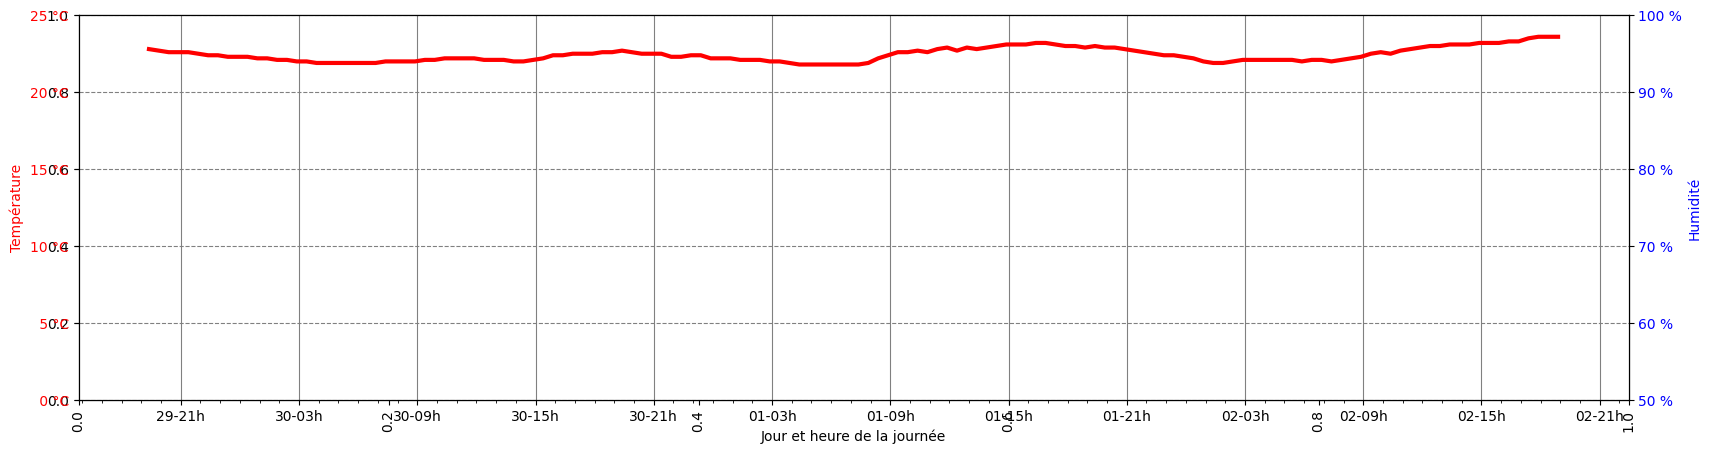

In [12]:
# Build the two curves graph (check Matplotlib documentation for details)
fig = plt.figure(figsize=(20,5))
plt.xticks(rotation='vertical')

graph1 = fig.add_subplot(111)

graph1.plot(xval, ytemp, color='r', linewidth=3)
graph1.set_ylabel(u'Température', color='r')
graph1.set_ylim(0, 25)
graph1.yaxis.grid(color='gray', linestyle='dashed')
for t in graph1.get_yticklabels() : t.set_color('r')
graph1.yaxis.set_major_formatter(FormatStrFormatter(u'%2.0f °C'))

graph2 = graph1.twinx()

graph2.plot(xval, yhum, color='b', linewidth=3)
graph2.set_ylabel(u'Humidité',color='b')
graph2.set_ylim(50,100)
for t in graph2.get_yticklabels(): t.set_color('b')
graph2.yaxis.set_major_formatter(FormatStrFormatter(u'%2i %%'))

graph1.xaxis.set_major_locator(dates.HourLocator(interval=6))
graph1.xaxis.set_minor_locator(dates.HourLocator())
graph1.xaxis.set_major_formatter(dates.DateFormatter("%d-%Hh"))
graph1.xaxis.grid(color='gray')
graph1.set_xlabel(u'Jour et heure de la journée')

# X display the resulting graph (you could generate a PDF/PNG/... in place of display).
# The display provides a minimal interface that notably allows you to save your graph
plt.show()